# Задача на регуляризцию

Загрузка данных

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd


def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T


data = pd.read_csv('data/non_linear.csv', sep=',')
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


In [2]:
degree = 8

# извлекаем признаки
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values

# разделяем на обучающую и валидационную выборку
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

# обучаем модель
model = Ridge(alpha=0).fit(X_train, y_train)

# получаем предсказания
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)

print("Качество на валидации (размер ошибки): %.3f" % mean_squared_error(y_valid, y_pred))
print("Качество на обучении (размер ошибки): %.3f" % mean_squared_error(y_train, y_pred_train))

Качество на валидации (размер ошибки): 0.119
Качество на обучении (размер ошибки): 0.052


C:\Users\kosty\Programming\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=7.97782e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


У класса *Ridge* в конструкторе есть параметр регуляризации - обучите регрессию при $\alpha=0.01$.

In [3]:
degree = 8

# извлекаем признаки
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values

# разделяем на обучающую и валидационную выборку
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

# обучаем модель
model = Ridge(alpha=0.01).fit(X_train, y_train)

# получаем предсказания
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)

print("Качество на валидации (размер ошибки): %.3f" % mean_squared_error(y_valid, y_pred))
print("Качество на обучении (размер ошибки): %.3f" % mean_squared_error(y_train, y_pred_train))

Качество на валидации (размер ошибки): 0.070
Качество на обучении (размер ошибки): 0.064


*Как изменилась ошибка на обучении? Как изменилась ошибка на валидации? Удалось ли победить переобучение? Используйте степень полинома n=12*

Ошибка на обучении выросла, а на валидации уменьшилась. Значит, модель стала лучше делать обобщение для совокупной выборки, вместо более качественного запоминания только обучающей выборки

Выполним аналогичные операции со степенью полинома $n=12$. При $\alpha=0$:

In [4]:
degree = 12

# извлекаем признаки
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values

# разделяем на обучающую и валидационную выборку
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

# обучаем модель
model = Ridge(alpha=0).fit(X_train, y_train)

# получаем предсказания
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)

print("Качество на валидации (размер ошибки): %.3f" % mean_squared_error(y_valid, y_pred))
print("Качество на обучении (размер ошибки): %.3f" % mean_squared_error(y_train, y_pred_train))

Качество на валидации (размер ошибки): 0.138
Качество на обучении (размер ошибки): 0.051


C:\Users\kosty\Programming\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.23291e-26): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


При $\alpha=0.01$:

In [5]:
degree = 12

# извлекаем признаки
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values

# разделяем на обучающую и валидационную выборку
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

# обучаем модель
model = Ridge(alpha=0.01).fit(X_train, y_train)

# получаем предсказания
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)

print("Качество на валидации (размер ошибки): %.3f" % mean_squared_error(y_valid, y_pred))
print("Качество на обучении (размер ошибки): %.3f" % mean_squared_error(y_train, y_pred_train))

Качество на валидации (размер ошибки): 0.077
Качество на обучении (размер ошибки): 0.058


C:\Users\kosty\Programming\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.83927e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ошибка на валидационной выборке выросла в обоих случаях, но заметно, что регуляризация помогает с ней справляться

### Домашняя работа: Lasso vs Ridge

На данных из файла `data/non_linear.csv`
* сгенерируйте данные до степени *degree = 8* включительно
* обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных
* используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей
* постройте два столбчатых графика, на которых отобразите величину коэффициентов в для Ridge регрессии и Lasso регрессии виде столбиков

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example](img/coeff_example.png)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd


data = pd.read_csv('data/non_linear.csv', sep=',')
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


Для уменьшения объема кода напишем функцию, выводящую график со сравнением коэффициентов:

In [7]:
from matplotlib import pyplot as plt


# степень полинома, ширина столбиков, размер графика (tuple)
def visualize_coef_comparison(degree, width=0.4, fig_size=(11, 7)):  
    # извлекаем признаки
    X = generate_degrees(data['x_train'], degree)
    y = data.y_train.values

    # обучаем модели
    ridge_model = Ridge(alpha=0.8).fit(X, y)
    lasso_model = Lasso(alpha=0.8).fit(X, y)

    # получаем коэффициенты
    labels = ['w' + str(i) for i in range(ridge_model.coef_.shape[0])]  # коэффициенты для подписи
    x = np.arange(len(labels))  # местоположение

    plt.figure(figsize=fig_size)
    plt.bar(x - width/2, ridge_model.coef_, width, label='Ridge коэф-ты', alpha=0.8)
    plt.bar(x + width/2, lasso_model.coef_, width, label='Lasso коэф-ты', alpha=0.8)

    plt.xlabel('Коэффициент')
    plt.ylabel('Значение w')
    plt.title('Сравнение значений коэффициентов')
    plt.xticks(x, labels)
    plt.legend()
    plt.show()

Сравнение коэффициентов для 1 степени полинома:

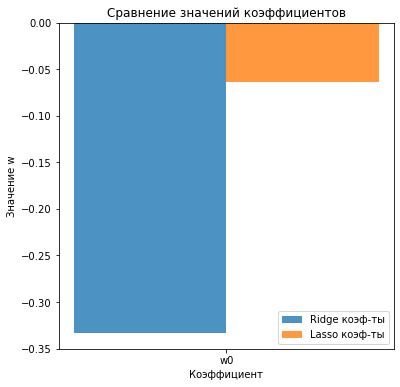

In [8]:
visualize_coef_comparison(1, fig_size=(6, 6))

Сравнение коэффициентов для 2 степени полинома:

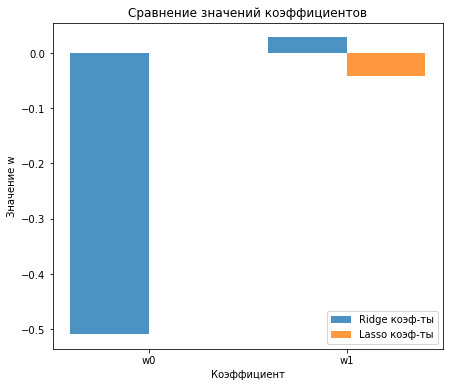

In [9]:
visualize_coef_comparison(2, fig_size=(7, 6))

Сравнение коэффициентов для 3 степени полинома:

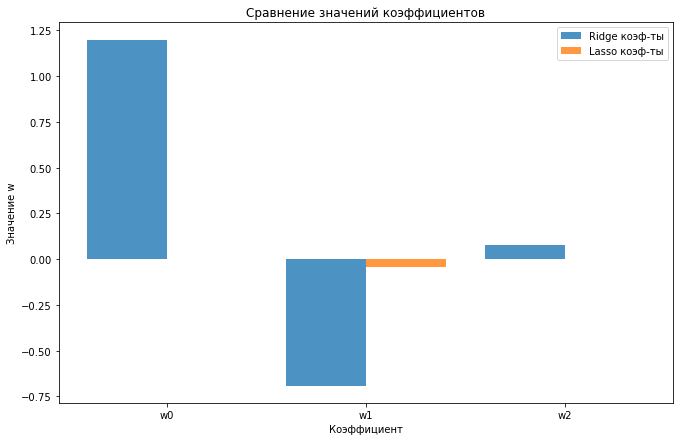

In [10]:
visualize_coef_comparison(3)

Сравнение коэффициентов для 4 степени полинома:

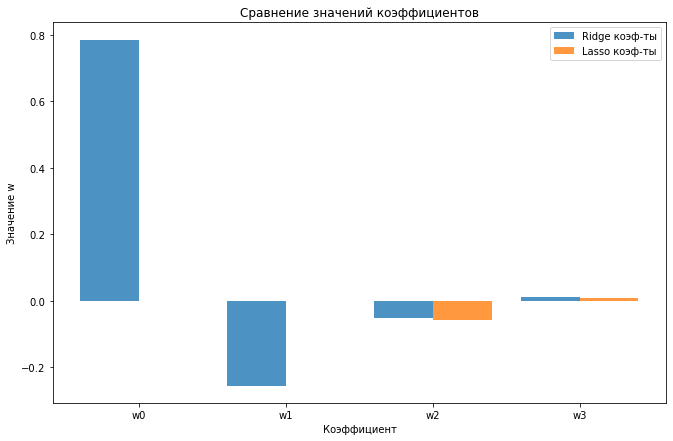

In [11]:
visualize_coef_comparison(4)

Сравнение коэффициентов для 5 степени полинома:

C:\Users\kosty\Programming\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.175216583727146, tolerance: 0.0031912256832197063
  model = cd_fast.enet_coordinate_descent(


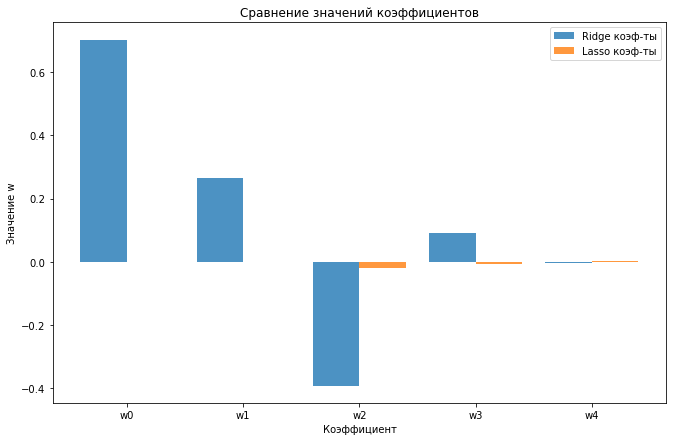

In [12]:
visualize_coef_comparison(5)

Сравнение коэффициентов для 6 степени полинома:

C:\Users\kosty\Programming\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7798167709854935, tolerance: 0.0031912256832197063
  model = cd_fast.enet_coordinate_descent(


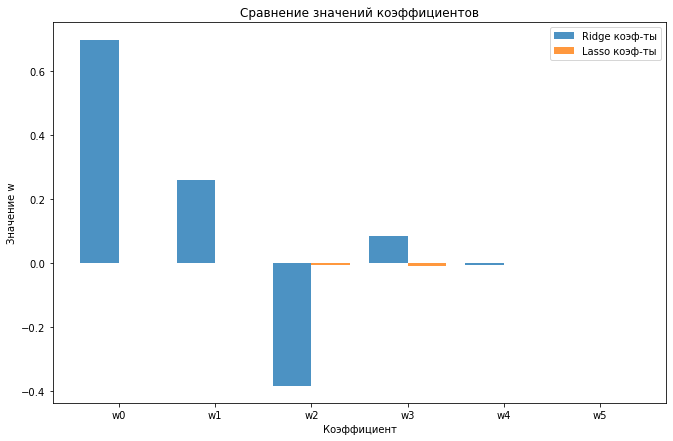

In [13]:
visualize_coef_comparison(6)

Сравнение коэффициентов для 7 степени полинома:

C:\Users\kosty\Programming\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.8696112922974266, tolerance: 0.0031912256832197063
  model = cd_fast.enet_coordinate_descent(


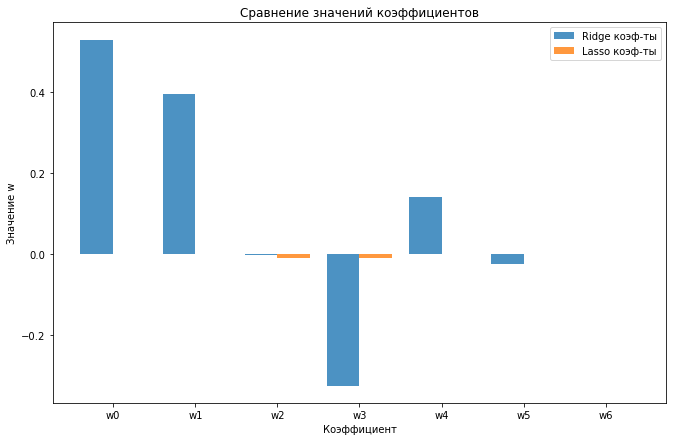

In [14]:
visualize_coef_comparison(7)

Сравнение коэффициентов для 8 степени полинома:

C:\Users\kosty\Programming\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.33530849350156, tolerance: 0.0031912256832197063
  model = cd_fast.enet_coordinate_descent(


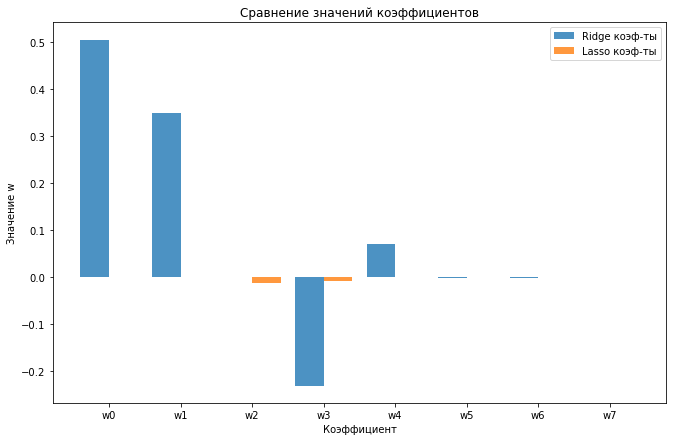

In [15]:
visualize_coef_comparison(8)

Можно заметить, что коэффициенты Lasso регрессии меньше по абсолютным значениям, и многие из них в данном случае оказались приравнены к нулю

# Домашнее задание: пишем Ridge регрессию.

Мы использовали реализацию Ridge регрессию из библиотеки sklearn. Для того, чтобы  прокачать навыки программирования и освежить в памяти, как перемножать матрицы в numpy, напишите код для вычисления коэффициентов полиномиальной регрессии (для степени *degree=8*) с регуляризацией по формуле
$$
\overline{w} = \left(X^TX + \lambda E\right)^{-1}X^T\overline{y}
$$

Для примера можно ориентироваться на то, как была реализована аналитическая формула для линейной регрессии в модуле "Линейная регрессия. Часть I"

Единичную матрицу $E$ можно получить с помощью функции https://docs.scipy.org/doc/numpy/reference/generated/numpy.eye.html . Размерность матрицы $k\times k$ (по количеству коэффициентов линейной регрессии). Напоминаю, что количество коэффициентов регрессии совпадает с количеством фичей регрессии, в задании будет $k=8$, т.к. генерим признаки для полинома восьмой степени.

In [16]:
degree = 8
alpha = 0.8

X = generate_degrees(data['x_train'], degree)
y = data.y_train.values

part1 = np.dot(X.T, X) + np.multiply(alpha, np.eye(degree))  # вычисляем значение в скобках
part2 = np.dot(np.linalg.inv(part1), X.T)  # получаем обратную матрицу, умножаем на X.T
coefs = np.dot(part2, y)  # получаем вектор коэффициентов

print(f'Получившиеся коэффициенты Ridge регрессии для степени {degree} и alpha = {alpha}:')
print(coefs)

Получившиеся коэффициенты Ridge регрессии для степени 8 и alpha = 0.8:
[ 1.51945529e+00  5.15154366e-01 -1.63106311e-01 -3.85994728e-01
  1.97020509e-01 -3.50333054e-02  2.36527353e-03 -3.01951321e-05]


# Домашнее задание: подбираем шаг градиентного спуска 

Очевидно, что чем больше шаг градиентного спуска (параметр *eta0* класса *SGDRegressor*), тем быстрее мы придём к оптимальным значениям. Используя под выше, поиграйтесь с параметром *eta0* и добейтесь , чтобы градиентный спуск закончился быстрее, чем за 200 шагов.

Сколько шагов у вас получилось? Какое качество *RMSE* у Вашего решения? Визуализируйте функцию потерь

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# для регрессии
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from scipy.spatial import distance
%matplotlib inline

data = pd.read_csv('data/non_linear.csv', sep=',')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()

X = data['x_train'].values.reshape(-1, 1) # превращаем X из простого массива в вектор-столбец
y = data['y_train'].values

# разбиваем на трейн и валидацию
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

data.head()

,x_train,y_train
5,1.182421,1.860341
6,1.251605,1.878928
7,1.270474,2.430015
8,1.402553,2.327856
9,1.427711,2.203649


Создадим функцию для вывода данных о градиентном спуске

In [18]:
def show_rmse(sgd_regressor):
    # инициализация весов случайным образом
    w_current = np.random.random(2)
    epsilon = 0.0001

    # изменения весов и ошибка на валидации
    weight_evolution, rmse_evolution = [], []

    for step in list(range(800)):
        # шаг градиентного спуска
        sgd_regressor = sgd_regressor.partial_fit(X_train, y_train)
        # отслеживаем изменения весов
        weight_evolution.append(
            distance.euclidean(w_current, sgd_regressor.coef_)
        )
        # проверяем критерий остановки
        if weight_evolution[-1] < epsilon:
            print(f'Итерации остановлены на шаге {step}\nRMSE = {rmse_evolution[-1]}'); break
        rmse_evolution.append(
            mean_squared_error(y_valid, sgd_regressor.predict(X_valid))
        )
        # обновление весов регрессии
        w_current = sgd_regressor.coef_.copy()
    plt.plot(range(step), rmse_evolution)
    plt.show()

Вывод исходного градиентного спуска:

Итерации остановлены на шаге 208
RMSE = 0.12847305359681985


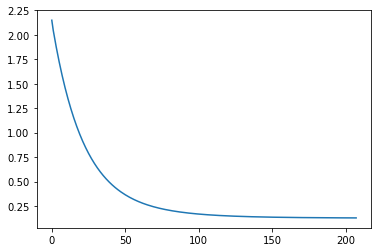

In [19]:
sgd_regressor = SGDRegressor(
    learning_rate='constant',
    eta0=0.009,
    fit_intercept=True,
    random_state=42
)

show_rmse(sgd_regressor)

Итерации остановлены на шаге 164
RMSE = 0.13993826217847752


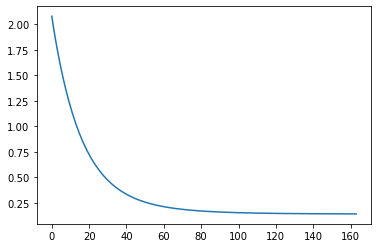

In [20]:
sgd_regressor = SGDRegressor(
    learning_rate='constant',
    eta0=0.012,
    fit_intercept=True,
    random_state=42
)

show_rmse(sgd_regressor)

# Домашнее задание: SGD на многомерных данных

Примените градиентный спуск к задаче прогнозирования цен на недвижимость в Бостоне. Какого качества на валидации удалось достичь по r2-score? Сколько итераций  понадобилось?

Без предварительной стандартизации

In [21]:
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score


boston_dataset = load_boston()
X = boston_dataset.data
y = boston_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

sgd_regressor = SGDRegressor(eta0=0.000012)

sgd_regressor.fit(X_train, y_train)

y_pred = sgd_regressor.predict(X_test)
print(f'Было выполнено {sgd_regressor.n_iter_} итераций')
print(f'r2-score={r2_score(y_test, y_pred)}')
print('MSE =', mean_squared_error(y_test, y_pred))

Было выполнено 23 итераций
r2-score=-0.03161279211104295
MSE = 107.8868322702227


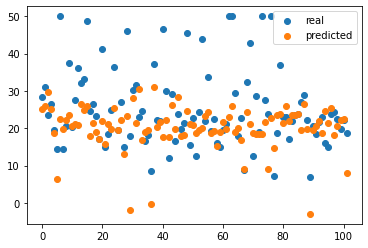

In [22]:
x_draw = range(y_test.shape[0])

plt.scatter(x_draw, y_test, label='real')
plt.scatter(x_draw, y_pred, label='predicted')
plt.legend()
plt.show()

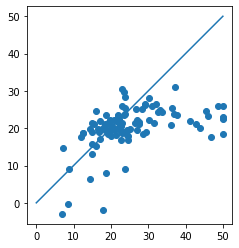

In [23]:
x_line = [0, max(max(y_test), max(y_pred))]
y_line = [0, max(max(y_test), max(y_pred))]

plt.scatter(y_test, y_pred)
plt.plot(x_line, y_line)

plt.gca().set_aspect('equal')

С использованием стандартизации параметров от изменения eta0 результат практически не меняется

In [24]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt


boston_dataset = load_boston()
X = boston_dataset.data
y = boston_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

boston_scaler = StandardScaler().fit(X_train)
X_train = boston_scaler.transform(X_train)
X_test = boston_scaler.transform(X_test)

sgd_regressor = SGDRegressor()

sgd_regressor.fit(X_train, y_train)

y_pred = sgd_regressor.predict(X_test)
print(f'Было выполнено {sgd_regressor.n_iter_} итераций')
print(f'r2-score={r2_score(y_test, y_pred)}')
print('MSE =', mean_squared_error(y_test, y_pred))

Было выполнено 30 итераций
r2-score=0.6704510881223931
MSE = 34.464470053553526


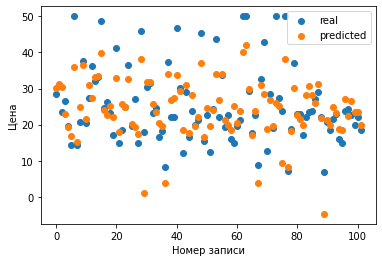

In [25]:
x_draw = range(y_test.shape[0])

plt.scatter(x_draw, y_test, label='real')
plt.scatter(x_draw, y_pred, label='predicted')
plt.xlabel('Номер записи')
plt.ylabel('Цена')
plt.legend()
plt.show()

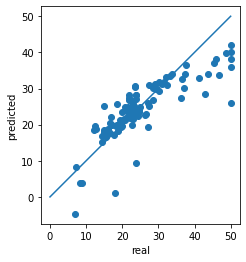

In [26]:
x_line = [0, max(max(y_test), max(y_pred))]
y_line = [0, max(max(y_test), max(y_pred))]

plt.scatter(y_test, y_pred)
plt.plot(x_line, y_line)
plt.xlabel('real')
plt.ylabel('predicted')

plt.gca().set_aspect('equal')

# Домашняя работа: добавляем регуляризацию в SGD

В реализацию функции `gradient` добавьте параметр $\lambda$, чтобы получить регуляризованный градиентный спуск

Формула поменяется следующим образом:
$$
\left\{
\begin{array}{cc}
\frac{\partial L}{\partial w_0} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} 1\cdot \left(y_i - \sum_{j=1}^{m}w_jx_j^i + 2\cdot 1\right)&\\
\frac{\partial L}{\partial w_k} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} x_k^i \cdot\left(y_i - \sum_{j=1}^{m}w_jx_j^i + 2x_k\right)& k\neq 0 \\
\end{array}
\right.
$$

В этом модуле мы узнали, как  обучать линейную регрессию, не "упираясь" в аппаратные ресурсы: использовать градиентный спуск.
Мы узнали, как детектировать переобучение модели и закрепили свои знания на примере полиномиальной регрессии и выяснили, как увеличить качество решения с помощью механизма регуляризации. Познакомились с двумя видами регуляризации -  Ridge и Lasso.

Загружаем исходные данные

In [128]:
import numpy as np
import pandas as pd

data = pd.read_csv('data/non_linear.csv', sep=',')
data = data[(data.x_train > 1) & (data.x_train < 5)].copy()
data.head()

,x_train,y_train
5,1.182421,1.860341
6,1.251605,1.878928
7,1.270474,2.430015
8,1.402553,2.327856
9,1.427711,2.203649


Моя реализация градиентного спуска

In [223]:
def gradientDescent(X, y, eta=0.01, epsilon=0.001):
    m = X.shape[1] # количество фичей
    # инициализируем рандомом веса
    w = np.random.random(m).reshape(1, -1)
    
    temp = np.matrix(np.zeros(w.shape))
    weight_evolution = distance.euclidean(w.ravel(), temp.ravel())

    while weight_evolution > epsilon:
        # считаем прогноз
        y_hat = X.dot(w.T)
        # вычисляем ошибку прогноза
        err = y - y_hat

        for j in range(m):
            term = np.multiply(err, X[:,j])
            temp[0, j] = w[0, j] - ((eta / len(X)) * np.sum(term))
        
        weight_evolution = distance.euclidean(w.ravel(), temp.ravel())
        w = temp

    return w

In [224]:
# трансформируем плоский массив X в вектор-столбец
X = data['x_train'].values.reshape(-1, 1)
n = X.shape[0]
# добавляем тривиальный признак w_0, столбец из единиц. См. прошлый урок, почему так
X = np.hstack([
    np.ones(n).reshape(-1,1),
    X
])

w = gradientDescent(X, data['y_train'].values.reshape(-1, 1))

Получается неправильно

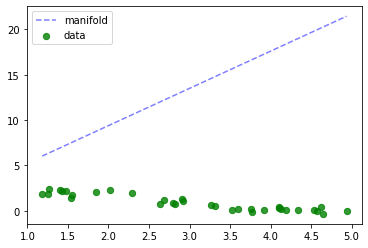

In [225]:
support = np.linspace(data['x_train'].min(), data['x_train'].max(), num=10)

# делаем предикт - считаем предсказания модели в каждой точке обучающей выборке в виде y=X*w
y_hat = np.hstack([np.ones(support.size).reshape(-1, 1), support.reshape(-1, 1)]).dot(w.T)

# строим график
plt.plot(support, y_hat, 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.legend()
plt.show()

Код для SGD

In [145]:
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt


def gradient(X, y, w, alpha=0) -> np.array:
    # количество обучающих примеров в выборке
    n = X.shape[0]
    # считаем прогноз
    y_hat = X.dot(w.T)
    # вычисляем ошибку прогноза
    error = y - y_hat
    # дальше pointwise перемножение - умножаем каждую из координат на ошибку
    pointwise_errors = np.multiply(X, error) + X
    # print(pointwise_errors.shape, X.shape, error.shape)
    grad = pointwise_errors.sum(axis=0) * (-1) * 2 / n
    return grad, error


def eval_w_next(X, y, eta, w_current):
    # вычисляем градиент
    grad, error = gradient(X, y, w_current)
    # делаем шаг градиентного спуска
    w_next = w_current - eta*grad
    # проверяем условие сходимости
    weight_evolution = distance.euclidean(w_current.ravel(), w_next.ravel())
    return (w_next, weight_evolution, grad)


def gradient_descent(X: np.array, y: np.array, eta=0.01, epsilon=0.001) -> np.array:
    m = X.shape[1] * 2 # количество фичей
    # инициализируем рандомом веса
    w = np.random.random(m).reshape(2, -1)
    w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
    step = 0
    # повторяем до сходимости вектора весов
    while weight_evolution > epsilon:
        w = w_next
        w_next, weight_evolution, grad = eval_w_next(X, y, eta, w)
        step += 1
        if step % 100 ==0:
            print("step %s |w-w_next|=%.5f, grad=%s" % (step, weight_evolution, grad))
    return w


# трансформируем плоский массив X в вектор-столбец
X = data['x_train'].values.reshape(-1, 1)
n = X.shape[0]
# добавляем тривиальный признак w_0, столбец из единиц. См. прошлый урок, почему так
X = np.hstack([
    np.ones(n).reshape(-1,1),
    X
])
w = gradient_descent(X, data['y_train'].values.reshape(-1, 1), eta=0.008)

step 100 |w-w_next|=0.04961, grad=[ 4.21266142 -1.2169541 ]
step 200 |w-w_next|=0.04083, grad=[ 3.4667078  -1.00146292]
step 300 |w-w_next|=0.03360, grad=[ 2.8528433  -0.82412968]
step 400 |w-w_next|=0.02765, grad=[ 2.34767837 -0.67819758]
step 500 |w-w_next|=0.02275, grad=[ 1.93196511 -0.55810629]
step 600 |w-w_next|=0.01872, grad=[ 1.58986395 -0.45928007]
step 700 |w-w_next|=0.01541, grad=[ 1.30834007 -0.37795342]
step 800 |w-w_next|=0.01268, grad=[ 1.0766668  -0.31102762]
step 900 |w-w_next|=0.01043, grad=[ 0.8860169  -0.25595266]
step 1000 |w-w_next|=0.00859, grad=[ 0.72912617 -0.21063005]
step 1100 |w-w_next|=0.00707, grad=[ 0.60001674 -0.1733329 ]
step 1200 |w-w_next|=0.00581, grad=[ 0.49376926 -0.14264012]
step 1300 |w-w_next|=0.00479, grad=[ 0.40633546 -0.11738223]
step 1400 |w-w_next|=0.00394, grad=[ 0.33438394 -0.09659687]
step 1500 |w-w_next|=0.00324, grad=[ 0.27517317 -0.07949206]
step 1600 |w-w_next|=0.00267, grad=[ 0.2264471  -0.06541606]
step 1700 |w-w_next|=0.00219, gra

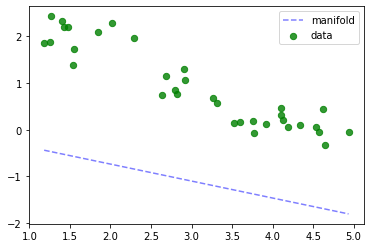

In [213]:
support = np.linspace(data['x_train'].min(), data['x_train'].max(), num=10)

# делаем предикт - считаем предсказания модели в каждой точке обучающей выборке в виде y=X*w
y_hat = np.hstack([np.ones(support.size).reshape(-1, 1), support.reshape(-1, 1)]).dot(w.T)

# строим график
plt.plot(support, y_hat, 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.legend()
plt.show()

# Домашнее задание: извлечение признаков из текста

Реализуем пайплайн в виде функции, при помощи которой обработаем все текстовые описания. Для каждого описания
* проводим токенизацию
* удаляем пунктуацию
* приводим к нижнему регистру
* удаляем стоп-слова


Примените процедуру токенизации к файлу brand_tweets_valid.csv

Сколько уникальных токенов получилось?

In [30]:
import nltk
import string
import pandas as pd

# дополнительный словарь со знаками пунктуации
nltk.download('punkt', download_dir='.')
nltk.download('stopwords', download_dir='.')

df = pd.read_csv('data/brand_tweets.csv', sep=',', encoding='utf8')
# удаляем строки, в которых отсутствует текст твита
df.drop(df[df.tweet_text.isnull()].index, inplace=True)
print(df.shape)

df.head()

[nltk_data] Downloading package punkt to ....
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to ....
[nltk_data]   Package stopwords is already up-to-date!


(3904, 3)


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [31]:
import nltk
import string
import pandas as pd
from nltk.corpus import stopwords


def tokenize_text(raw_text: str):
    """
    Функция для токенизации текста
    
    :param raw_text: исходная текстовая строка
    """
    tokenized_str = nltk.word_tokenize(raw_text)
    
    tokens = [word.lower()
              for word in tokenized_str
              if
              word not in string.punctuation]
    
    stop_words = set(stopwords.words('english'))
    
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    return filtered_tokens

# применяем функцию в датафрейму с помощью метода .apply()
tokenized_tweets = df.tweet_text.apply(tokenize_text)

# добавляем новую колонку в исходный датафрейм
df = df.assign(
   tokenized=tokenized_tweets
)

df.tokenized.head()

0    [wesley83, 3g, iphone, 3, hrs, tweeting, rise_...
1    [jessedee, know, fludapp, awesome, ipad/iphone...
2        [swonderlin, wait, ipad, 2, also, sale, sxsw]
3    [sxsw, hope, year, 's, festival, n't, crashy, ...
4    [sxtxstate, great, stuff, fri, sxsw, marissa, ...
Name: tokenized, dtype: object

Посчитаем количество уникальных слов

In [32]:
unique_words = set()

for tweet in tokenized_tweets:
    unique_words.update(tweet)

len(unique_words)

7252

# Домашнее задание: поиск дубликатов в тексте

Потренируйтесь в нахождении матрицы схожести для валидационного сета

Загрузите brand_tweets_valid.csv, примените объект vectorizer, обученный на датасете brand_tweets.csv (просто скопируйте этот код из урока)
Примените функцию pairwise_distances к полученной матрице

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

# инициализируем объект, который токенизирует наш текст
# в качестве единственного аргимента передаём функцию, которую мы написали в Уроке 2
# Она разбивает каждый документ на токены
vectorizer = CountVectorizer(tokenizer=tokenize_text)

# применяем наш объект-токенизатор к датафрейму с твитами
document_matrix = vectorizer.fit_transform(df.tweet_text.values)

# результат - матрица, в которой находятся числа, строк в мастрице столько, сколько документов
# а столбцов столько, сколько токенов
document_matrix

<3904x7257 sparse matrix of type '<class 'numpy.int64'>'
	with 46023 stored elements in Compressed Sparse Row format>

In [64]:
import pandas as pd

df_valid = pd.read_csv('data/brand_tweets_valid.csv', sep=',', encoding='utf8')
# удаляем строки, в которых отсутствует текст твита
df_valid.drop(df_valid[df_valid.tweet_text.isnull()].index, inplace=True)

Вычисляем попарные схожести между элементами разреженной матрицы исходных твитов

In [66]:
from sklearn.metrics import pairwise_distances

tweet_distance = 1 - pairwise_distances(document_matrix, metric="cosine")

tweet_distance.reshape(-1, 1)

array([[1.        ],
       [0.06933752],
       [0.10482848],
       ...,
       [0.1672484 ],
       [0.16116459],
       [1.        ]])

In [67]:
import numpy as np

source_tweet_index = 1
# отсортируем твиты по “похожести” - чем более похоже на source_tweet_index,
# тем ближе к началу списка sorted_similarity
sorted_similarity = np.argsort(-tweet_distance[source_tweet_index,:])

sorted_similarity

array([   1, 3030, 2959, ...,  573, 1587, 2998], dtype=int64)

In [69]:
print(df.iloc[source_tweet_index].tweet_text)
print('-------------')
print(df.iloc[sorted_similarity[1]].tweet_text)
print('-------------')
print(df.iloc[sorted_similarity[2]].tweet_text)
print('-------------')
print(df.iloc[sorted_similarity[3]].tweet_text)
print('-------------')
print(df.iloc[sorted_similarity[4]].tweet_text)
print('-------------')
print(df.iloc[sorted_similarity[5]].tweet_text)

@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW
-------------
I hope everyone has an awesome weekend at #SXSW! I know @mention is giving away some great Apple prizes.
-------------
Badger @mention on Angel News #sxsw {link} - nice one. Also we're giving away a free iPad 2 - {link} #contest
-------------
@mention I did not know Lightbox was an android app until #SXSW #hhrs
-------------
Hey foodies: if you're in Austin for SXSW download the new ARW iphone/android app and use it as a guide to dine while you're in town! #SXSW
-------------
You know it is #SXSW season when there are 10 app updates whenever you open up the iPhone app store


Напишем функцию, которая будет принимать текст твита, и выдавать 5 самых похожих на него в исходной базе твитов

In [83]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import pairwise_distances


def show_similar_tweets(new_tweet):
    # получаем массив твитов, дополняем его новым твитом в конце
    tweets = df.tweet_text.values
    all_tweets = np.append(tweets, new_tweet)
    
    # инициализируем объект, который токенизирует наш текст
    vectorizer = CountVectorizer(tokenizer=tokenize_text)
    
    # применяем наш объект-токенизатор к дополненному массиву твитов
    document_matrix = vectorizer.fit_transform(all_tweets)
    
    # вычисляем попарные схожести между элементами разреженной матрицы твитов
    tweet_distance = 1 - pairwise_distances(document_matrix, metric="cosine")
    
    # отсортируем твиты по похожести
    sorted_similarity = np.argsort(-tweet_distance[-1, :])
    
    # получим адреса пяти самых похожих твитов
    best_locations = sorted_similarity[1:6]
    
    # создадим массив этих твитов
    best_tweets = np.take(a=all_tweets, indices=best_locations)
        
    return best_tweets

Получим похожие твиты вызовом функции:

In [84]:
tweet_to_compare = df_valid.iloc[14].tweet_text

similar_tweets = show_similar_tweets(tweet_to_compare)

print('Original tweet: \n', tweet_to_compare)
print('\nSimilar tweets:')
for i, tweet in enumerate(similar_tweets):
    print(i+1, tweet)

Original tweet: 
 Popup Apple Store crew has been giving out water to the people in line but they are in street clothes. No Apple logos anywhere yet. #SXSW

Similar tweets:
1 Line forming at popup Apple Store, no sign of Apple yet. #sxsw {link}
2 The line at the popup Apple Store is phenomenal. #sxsw #apple #ipad2  {link}
3 200 people in line at pop up Apple store at #sxsw
4 How long is the line at the apple store? #SXSW
5 The line at the #sxsw Apple Popup Store was shorter than the line at the Starbucks across the street. So, I really had no choice‰Ы_


* Пользуясь матрицей схожести, полученной на предыдущем этапе, найдите top-5 твитов, похожих на твит валидационного сета с id=14.

У вас есть матрица схожести между объектами. Попробуйте решить задачу поиска дубликатов в тексте

1. Визуализируйте гистограмму значений в матрице схожести
1. Напишите функцию на Python, которая принимает индекс твита, пороговое значение (число от $0.0$ до $1.0$ и матрицу схожести), а затем выводит все твиты, схожесть которых больше, чем пороговое значение

Гистограмма схожести твитов во всем массиве данных

<function matplotlib.pyplot.show(close=None, block=None)>

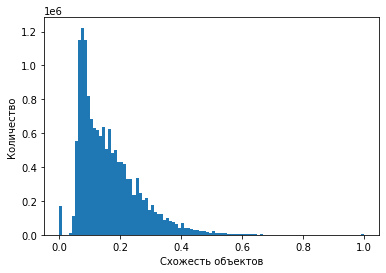

In [126]:
import matplotlib.pyplot as plt

plt.hist(x=tweet_distance.reshape(-1), bins=100)
plt.xlabel('Схожесть объектов')
plt.ylabel('Количество')

plt.show

Функция для отображения твитов, у которых схожесть превышает заданную пороговую

In [94]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import pairwise_distances


def show_threshold_tweets(tweet_id, similarity_matrix, threshold=0.3):
    # получим коэффициенты схожести для нужного твита
    similarity_line = similarity_matrix[tweet_id, :]
    # индексы, соответствующие превышению порогового значения
    similarity_indices = np.argwhere(similarity_line > threshold)
    # получаем твиты
    similar_tweets = np.take(df.tweet_text.values, similarity_indices)
    
    return similar_tweets

In [123]:
compare_id = 33
threshold = 0.46

tweet_to_compare = df.iloc[compare_id].tweet_text
sim_tweets = show_threshold_tweets(compare_id, tweet_distance, threshold)

print('Original tweet: \n', tweet_to_compare)
print(f'\nSimilar tweets (threshold={threshold}):')
for i, tweet in enumerate(sim_tweets):
    print(i, ''.join(tweet))

Original tweet: 
 Anyone at  #SXSW who bought the new iPad want to sell their older iPad to me?

Similar tweets (threshold=0.46):
0 Anyone at  #sxsw want to sell their old iPad?
1 Anyone at  #SXSW who bought the new iPad want to sell their older iPad to me?
2 Mashable! - The iPad 2 Takes Over SXSW [VIDEO] #ipad #sxsw #gadgets {link}
3 I laughed at the iPad until I spent this week hauling my macbook everywhere. Now I really want an iPad and a shoulder rub. #sxsw
4 Is anyone bringing their iPad vs. their computer to #sxsw?
5 @mention  so #jealous of you. #sxsw &amp; you have the new iPad?!
6 At #SXSW &amp; looking to sell your iPad 1?
7 The iPad 2 Takes Over SXSW [VIDEO] {link} #apple #iPad #SXSW
8 iPad design malady: iPad Elbow - I hate the iPad's back button with the heat of a million suns. #tapworthy #sxsw
9 @mention I want that iPad case! #sxswbuffalo #sxsw
